In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import fast_ot
import numpy as np
import time
from scipy.stats import multivariate_normal
from scipy.spatial.distance import cdist
import ot
%load_ext autoreload
%autoreload 2

/home/rainorangelemon/micromamba/envs/diffcert/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# Generate data

dim = 2
n_sample = 1000

samples0 = multivariate_normal.rvs(np.zeros((dim,)), np.eye(dim), size=n_sample).reshape(-1, dim)
samples1 = multivariate_normal.rvs(np.ones((dim,)), np.eye(dim), size=n_sample).reshape(-1, dim)

C = cdist(samples0, samples1)
p = np.ones((C.shape[0],)) * 1 / C.shape[0]
q = np.ones((C.shape[1],)) * 1 / C.shape[1]

In [25]:
# Run drot
stepsize = 2. / sum(C.shape)
maxiters = 100000
eps = 1e-2

result = fast_ot.drot(C, p, q, C.shape[0], C.shape[1], stepsize, maxiters, eps, False, True)
print(f'Iteration stops at #{len(result.objectives)}')

Iteration stops at #3271


In [32]:
# Get ground-truth
femd = ot.emd2(p, q, C, numItermax=2000000)  # LP solver

## Drot on the same matrix C

Text(0.5, 0, 'Iteration')

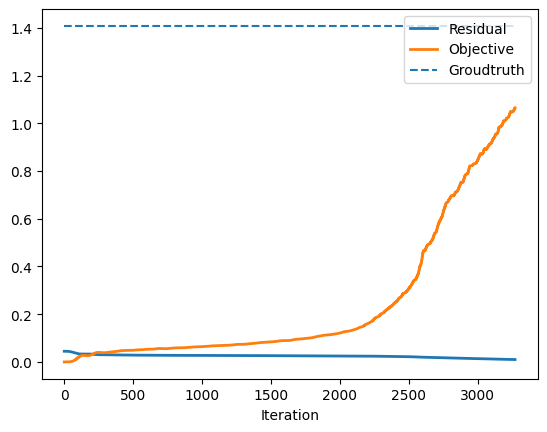

In [33]:
plt.plot(result.residuals, label='Residual', linewidth=2)
plt.plot(np.array(result.objectives), label='Objective', linewidth=2)
plt.hlines(femd, xmin=0, xmax=len(result.objectives), linestyles='dashed', label='Groudtruth')

# plt.yscale('log')
plt.legend()
plt.xlabel("Iteration")